In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style = 'whitegrid', palette = 'Set2')

In [2]:
df = pd.read_csv('Life Expectancy Data.csv')

In [3]:
df.columns = df.columns.str.replace(' ', '_').str.lower()

df.columns

Index(['country', 'year', 'status', 'life_expectancy_', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles_', '_bmi_', 'under-five_deaths_', 'polio', 'total_expenditure',
       'diphtheria_', '_hiv/aids', 'gdp', 'population',
       '_thinness__1-19_years', '_thinness_5-9_years',
       'income_composition_of_resources', 'schooling'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   object 
 3   life_expectancy_                 2928 non-null   float64
 4   adult_mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   hepatitis_b                      2385 non-null   float64
 9   measles_                         2938 non-null   int64  
 10  _bmi_                            2904 non-null   float64
 11  under-five_deaths_               2938 non-null   int64  
 12  polio               

In [5]:
df.describe()

,year,life_expectancy_,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles_,_bmi_,under-five_deaths_,polio,total_expenditure,diphtheria_,_hiv/aids,gdp,population,_thinness__1-19_years,_thinness_5-9_years,income_composition_of_resources,schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


## Handling Missing Values
<br>
Missing Values akan diisi menggunakan interpolate, mengingat data ini memiliki feature tahun dimana bisa dikategorikan sebagai data time series

In [6]:
df.shape

(2938, 22)

In [7]:
round((df.isna().sum()/df.shape[0] * 100).sort_values(ascending = False), 2)

population                         22.19
hepatitis_b                        18.82
gdp                                15.25
total_expenditure                   7.69
alcohol                             6.60
income_composition_of_resources     5.68
schooling                           5.55
_bmi_                               1.16
_thinness__1-19_years               1.16
_thinness_5-9_years                 1.16
diphtheria_                         0.65
polio                               0.65
adult_mortality                     0.34
life_expectancy_                    0.34
under-five_deaths_                  0.00
_hiv/aids                           0.00
measles_                            0.00
percentage_expenditure              0.00
infant_deaths                       0.00
status                              0.00
year                                0.00
country                             0.00
dtype: float64

In [8]:
country_list = df.country.unique()

fill_list = list(df.columns)

In [9]:
for country in country_list:
    df.loc[df.country == country,fill_list] = df.loc[df.country == country,fill_list].interpolate()
    

df.dropna(inplace=True)

after = list(df.loc[df.country.isin(country_list), 'country'].unique())

In [10]:
print(f'Jumlah negara sebelum handling missing values : {len(country_list)}\n\nJumlah negara sesudah handling missing values : {len(after)}')

Jumlah negara sebelum handling missing values : 193

Jumlah negara sesudah handling missing values : 133


In [11]:
print(f'Daftar semua negara sebelum handling missing values : \n\n{country_list}')

Daftar semua negara sebelum handling missing values : 

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' "Côte d'Ivoire" 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Ic

In [12]:
print(f'Daftar semua negara sesudah handling missing values : \n\n{after}')

Daftar semua negara sesudah handling missing values : 

['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Costa Rica', 'Croatia', 'Cyprus', 'Djibouti', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'France', 'Gabon', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Lithuania', 'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta', 'Mauritania', 'Ma

In [13]:
df.shape

(1987, 22)

In [14]:
round((df.isna().sum()/df.shape[0] * 100).sort_values(ascending = False), 2)

schooling                          0.0
income_composition_of_resources    0.0
year                               0.0
status                             0.0
life_expectancy_                   0.0
adult_mortality                    0.0
infant_deaths                      0.0
alcohol                            0.0
percentage_expenditure             0.0
hepatitis_b                        0.0
measles_                           0.0
_bmi_                              0.0
under-five_deaths_                 0.0
polio                              0.0
total_expenditure                  0.0
diphtheria_                        0.0
_hiv/aids                          0.0
gdp                                0.0
population                         0.0
_thinness__1-19_years              0.0
_thinness_5-9_years                0.0
country                            0.0
dtype: float64

In [15]:
df.reset_index(inplace=True)

## Handling Outliers
<br>
Outliers akan dihandling menggunakan outlier capping dengan 1.5 * IQR dan 3 * IQR (untuk yg terlalu extreme)

In [16]:
from sklearn.compose import ColumnTransformer
from feature_engine.outliers import Winsorizer

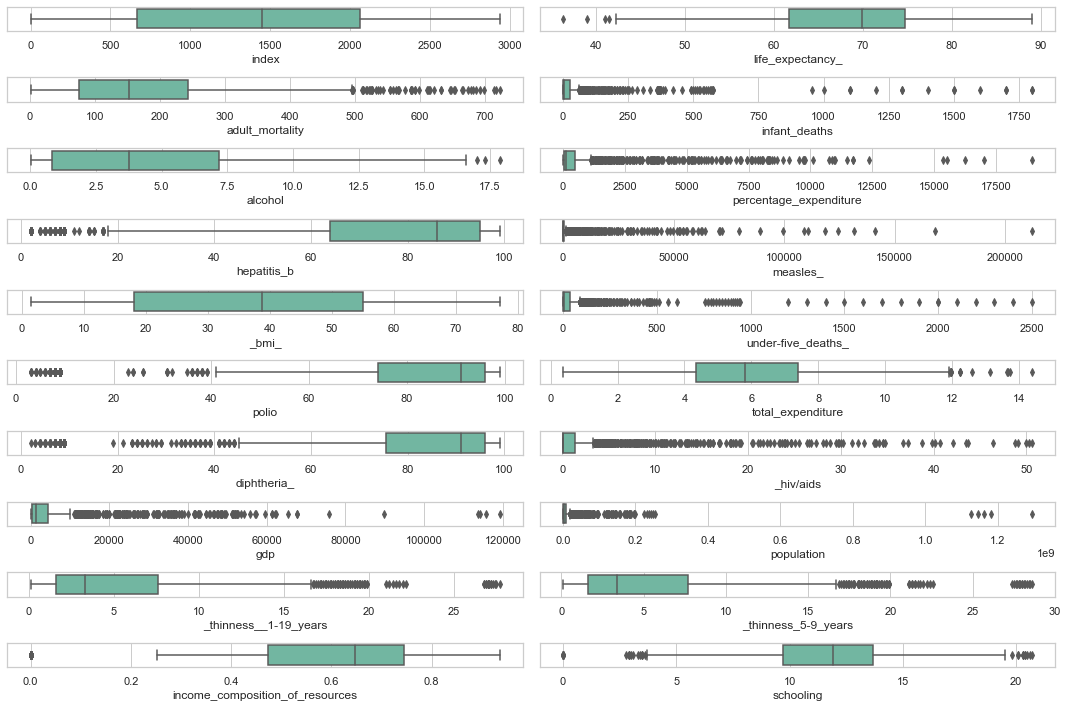

In [17]:
numerical_features = df.drop(columns=['country', 'year', 'status']).columns

plt.figure(figsize=(15,10))

num_codes = {}

for i in range(len(numerical_features)) :
    num_codes[numerical_features[i]] = i

for features, i in num_codes.items() :
    plt.subplot(10, 2, i+1)
    sns.boxplot(df[features])
    
plt.tight_layout()

In [18]:
not_extreme = ['adult_mortality', 'alcohol', 'hepatitis_b', '_bmi_', 'polio', 'total_expenditure', 'diphtheria_', '_thinness__1-19_years', '_thinness_5-9_years', 'income_composition_of_resources', 'schooling', 'life_expectancy_']

In [19]:
extreme = ['infant_deaths', 'percentage_expenditure', 'measles_', 'under-five_deaths_', '_hiv/aids', 'gdp', 'population']

In [20]:
transformer = ColumnTransformer([
    ('IQR_1_5', Winsorizer(capping_method='iqr', tail='both', fold=1.5), not_extreme),
    ('IQR_3', Winsorizer(capping_method='iqr', tail='both', fold=3), extreme)
])

In [21]:
df_capped = pd.DataFrame(transformer.fit_transform(df), columns=not_extreme+extreme)

### Left Tail Caps

In [22]:
transformer.transformers_[0][1].left_tail_caps_, transformer.transformers_[1][1].left_tail_caps_

({'adult_mortality': -177.0,
  'alcohol': -8.71,
  'hepatitis_b': 17.5,
  '_bmi_': -37.12500000000001,
  'polio': 41.0,
  'total_expenditure': -0.17749999999999932,
  'diphtheria_': 44.75,
  '_thinness__1-19_years': -7.4,
  '_thinness_5-9_years': -7.549999999999999,
  'income_composition_of_resources': 0.06499999999999995,
  'schooling': 3.6999999999999993,
  'life_expectancy_': 42.2},
 {'infant_deaths': -71.0,
  'percentage_expenditure': -1294.7308171500001,
  'measles_': -1498.5,
  'under-five_deaths_': -104.0,
  '_hiv/aids': -3.7999999999999994,
  'gdp': -11786.379537400002,
  'population': -22090763.5})

### Right Tail Caps

In [23]:
transformer.transformers_[0][1].right_tail_caps_, transformer.transformers_[1][1].right_tail_caps_

({'adult_mortality': 495.0,
  'alcohol': 16.73,
  'hepatitis_b': 141.5,
  '_bmi_': 110.275,
  'polio': 129.0,
  'total_expenditure': 11.9225,
  'diphtheria_': 126.75,
  '_thinness__1-19_years': 16.6,
  '_thinness_5-9_years': 16.849999999999998,
  'income_composition_of_resources': 1.153,
  'schooling': 19.7,
  'life_expectancy_': 94.2},
 {'infant_deaths': 97.0,
  'percentage_expenditure': 1795.070826275,
  'measles_': 1998.0,
  'under-five_deaths_': 141.0,
  '_hiv/aids': 5.299999999999999,
  'gdp': 16612.463299300005,
  'population': 29913430.0})

In [24]:
df_capped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   adult_mortality                  1987 non-null   float64
 1   alcohol                          1987 non-null   float64
 2   hepatitis_b                      1987 non-null   float64
 3   _bmi_                            1987 non-null   float64
 4   polio                            1987 non-null   float64
 5   total_expenditure                1987 non-null   float64
 6   diphtheria_                      1987 non-null   float64
 7   _thinness__1-19_years            1987 non-null   float64
 8   _thinness_5-9_years              1987 non-null   float64
 9   income_composition_of_resources  1987 non-null   float64
 10  schooling                        1987 non-null   float64
 11  life_expectancy_                 1987 non-null   float64
 12  infant_deaths       

In [25]:
df_capped.head()

,adult_mortality,alcohol,hepatitis_b,_bmi_,polio,total_expenditure,diphtheria_,_thinness__1-19_years,_thinness_5-9_years,income_composition_of_resources,schooling,life_expectancy_,infant_deaths,percentage_expenditure,measles_,under-five_deaths_,_hiv/aids,gdp,population
0,263.0,0.01,65.0,19.1,41.0,8.16,65.0,16.6,16.85,0.479,10.1,65.0,62.0,71.279624,1154.0,83.0,0.1,584.259210,29913430.0
1,271.0,0.01,62.0,18.6,58.0,8.18,62.0,16.6,16.85,0.476,10.0,59.9,64.0,73.523582,492.0,86.0,0.1,612.696514,327582.0
2,268.0,0.01,64.0,18.1,62.0,8.13,64.0,16.6,16.85,0.470,9.9,59.9,66.0,73.219243,430.0,89.0,0.1,631.744976,29913430.0
3,272.0,0.01,67.0,17.6,67.0,8.52,67.0,16.6,16.85,0.463,9.8,59.5,69.0,78.184215,1998.0,93.0,0.1,669.959000,3696958.0
4,275.0,0.01,68.0,17.2,68.0,7.87,68.0,16.6,16.85,0.454,9.5,59.2,71.0,7.097109,1998.0,97.0,0.1,63.537231,2978599.0


In [26]:
df.loc[:, ['country', 'year', 'status']].head()

,country,year,status
0,Afghanistan,2015,Developing
1,Afghanistan,2014,Developing
2,Afghanistan,2013,Developing
3,Afghanistan,2012,Developing
4,Afghanistan,2011,Developing


In [27]:
df_capped = pd.merge(
    df_capped,
    df.loc[:, ['country', 'year', 'status']],
    right_index=True, left_index=True
    )

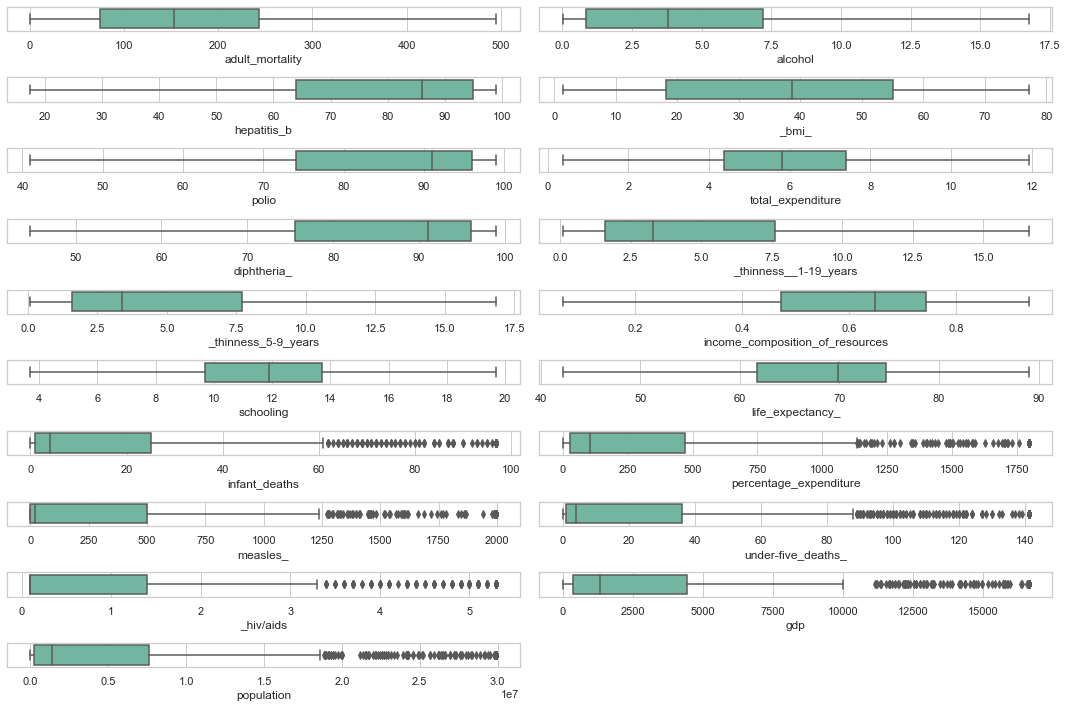

In [28]:
numerical_features = df_capped.drop(columns=['country', 'year', 'status']).columns

plt.figure(figsize=(15,10))

num_codes = {}

for i in range(len(numerical_features)) :
    num_codes[numerical_features[i]] = i

for features, i in num_codes.items() :
    plt.subplot(10, 2, i+1)
    sns.boxplot(df_capped[features])
    
plt.tight_layout()

In [29]:
df_capped.to_csv('clean_data.csv', index = False)